# Clustering Jerárquico

## Carga de paquetes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 

import pylab


import scipy.cluster.hierarchy

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido


from scipy.signal import savgol_filter

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#import funciones as fn

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples #Librería Silhouette

from sklearn.cluster import AgglomerativeClustering #Librería para etiquetar por clustering aglomerativo

## Carga de dataset

In [2]:
df_base = pd.read_pickle('C:/Users/nicol/tp_1/sources/df_todo_1_Normalized.pickle')
df_2 = df_base
columnas = df_2.columns

## Selecciono features a utilizar

In [3]:
features_af = ['danceability','energy','loudness','speechiness','acousticness','acousticness','valence']
features_af_otras= ['duration_ms','tempo','time_signature']
features_aa = ['p00_C_50','p01_C#_50','p02_D_50','p03_D#_50','p04_E_50','p05_F_50']

In [4]:
genre_real = df_2['genre']

In [5]:
df_2.head()

,af_duration_ms,af_popularity,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,...,aa_t11_dif_iqr,aa_pitch_dif_mediana,aa_pitch_dif_iqr,aa_pitch_mediana,aa_pitch_iqr,aa_timbre_dif_mediana,aa_timbre_dif_iqr,aa_timbre_mediana,aa_timbre_iqr,genre
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,0.726174,1.247754,0.165327,-0.925985,-0.050661,-0.919722,5.199338,0.251604,0.588412,0.638371,...,-0.021930,-0.065522,-0.897842,-1.993631,-1.688196,1.117972,0.393431,-0.399824,1.525081,jazz
3X3p3u03P8eFL8WTH0oaaU,0.693455,1.168949,0.877028,-0.714776,0.362241,-0.676945,5.199338,-0.178175,0.577715,0.124164,...,0.114185,-0.617915,0.316438,-1.508151,-1.374796,-0.054164,0.555276,-0.203004,0.619801,jazz
4KlXeaheot0OI9PoOWspvZ,0.721337,-0.012660,1.950034,-0.465658,0.889495,-0.046101,-5.199338,-0.393971,0.206966,0.635270,...,-1.591094,-0.245688,-0.065156,-1.302695,-0.058327,0.090610,0.991101,-0.875478,2.141952,jazz
3j76McoUI18gDoqxYE14Bu,0.185273,0.321971,1.227334,-0.063341,-0.619855,-0.682799,5.199338,-1.455776,0.329483,0.345529,...,1.241926,0.405086,0.262715,0.596929,0.785468,-0.031656,1.554605,-1.579393,0.811051,jazz
4zxd4tiXPlWMqoJltbVTbE,0.257676,1.549706,0.154591,-0.929525,1.247754,-0.352814,5.199338,-0.834427,0.706628,-0.860679,...,0.010747,-0.915365,-0.717372,-1.460955,-1.267906,-0.620012,0.250093,-0.102637,2.070936,jazz


In [6]:
df_2 = df_2.drop(['genre'], axis=1)
features_af = df_2.columns

##  Escalado rango 0-1

In [7]:
# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0,1))
#df_2=scaler.fit_transform(df_2)
#df_2 = pd.DataFrame(df_2)
#df_2.columns = features_af
#df_2

## Filtro filas para acelerar procesamiento

In [8]:
#Trabajo con primeras 200 filas
#df_2 = df_2.iloc[:100,:]
df_2

,af_duration_ms,af_popularity,af_danceability,af_energy,af_key,af_loudness,af_mode,af_speechiness,af_acousticness,af_instrumentalness,...,aa_t10_dif_iqr,aa_t11_dif_iqr,aa_pitch_dif_mediana,aa_pitch_dif_iqr,aa_pitch_mediana,aa_pitch_iqr,aa_timbre_dif_mediana,aa_timbre_dif_iqr,aa_timbre_mediana,aa_timbre_iqr
id,,,,,,,,,,,,,,,,,,,,,
4d3XHYFFuYYzxWr2cJ6yQl,0.726174,1.247754,0.165327,-0.925985,-0.050661,-0.919722,5.199338,0.251604,0.588412,0.638371,...,0.275816,-0.021930,-0.065522,-0.897842,-1.993631,-1.688196,1.117972,0.393431,-0.399824,1.525081
3X3p3u03P8eFL8WTH0oaaU,0.693455,1.168949,0.877028,-0.714776,0.362241,-0.676945,5.199338,-0.178175,0.577715,0.124164,...,1.133828,0.114185,-0.617915,0.316438,-1.508151,-1.374796,-0.054164,0.555276,-0.203004,0.619801
4KlXeaheot0OI9PoOWspvZ,0.721337,-0.012660,1.950034,-0.465658,0.889495,-0.046101,-5.199338,-0.393971,0.206966,0.635270,...,0.734792,-1.591094,-0.245688,-0.065156,-1.302695,-0.058327,0.090610,0.991101,-0.875478,2.141952
3j76McoUI18gDoqxYE14Bu,0.185273,0.321971,1.227334,-0.063341,-0.619855,-0.682799,5.199338,-1.455776,0.329483,0.345529,...,0.830116,1.241926,0.405086,0.262715,0.596929,0.785468,-0.031656,1.554605,-1.579393,0.811051
4zxd4tiXPlWMqoJltbVTbE,0.257676,1.549706,0.154591,-0.929525,1.247754,-0.352814,5.199338,-0.834427,0.706628,-0.860679,...,0.116733,0.010747,-0.915365,-0.717372,-1.460955,-1.267906,-0.620012,0.250093,-0.102637,2.070936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5vSsQH8wH68PDKJbNfxzpc,1.382642,0.063341,0.017264,2.124001,-0.619855,0.591746,-5.199338,-0.080264,-1.544770,1.350775,...,-0.097500,2.065585,-2.366175,2.907709,1.373230,2.433034,2.374119,1.138536,0.088782,-0.669559
7xYKAlU77jAAnAixQ5IgSn,1.757105,-5.199338,0.627544,0.352898,-0.050661,-0.320512,-5.199338,-1.501086,-0.871219,0.666564,...,0.053897,0.908458,-1.520597,1.246978,1.011449,1.345025,0.772110,0.588031,-0.043737,-0.562514
4hXEgyy5nNgdiBvJcJ9o8u,-0.625372,-5.199338,1.247754,0.338599,0.889495,0.219519,5.199338,-0.216904,-0.482260,0.745469,...,1.745443,0.631805,-1.684224,1.033911,0.120959,0.539348,-0.132383,1.246705,-0.495399,0.295424


## Cluestering Jerárquico

### Método average

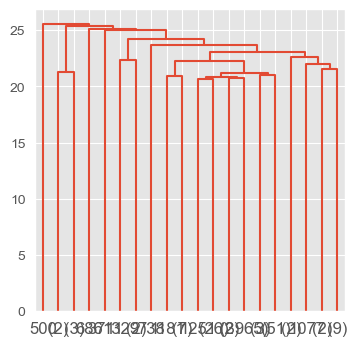

In [9]:
# Clustering (scipy)
z = linkage(df_2, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

### Estiramiento de la imagen

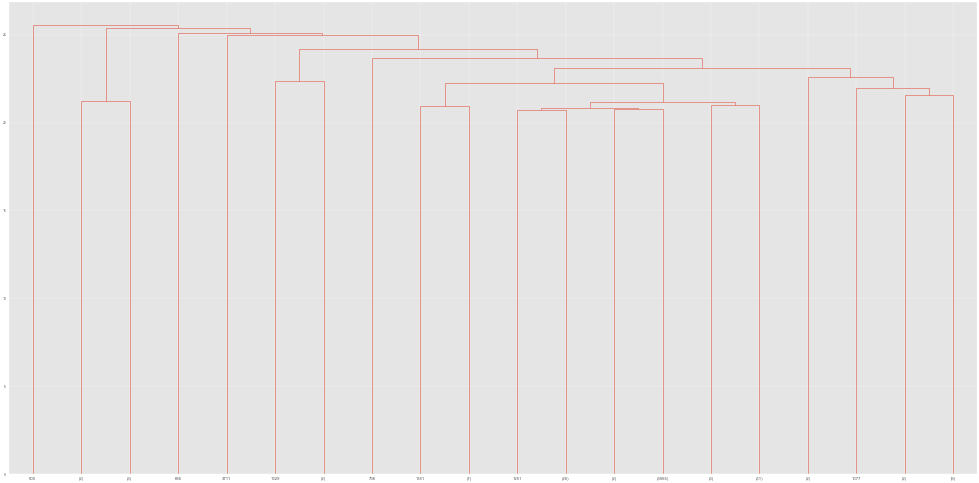

In [10]:
plt.rcParams['figure.figsize'] = [50, 25]
plt.rcParams['figure.dpi'] = 25 # 200 e.g. is really fine, but slower
plt.figure()
dn = dendrogram(z, p=20 ,truncate_mode = 'lastp')

## Matriz de distancia entre las observaciones

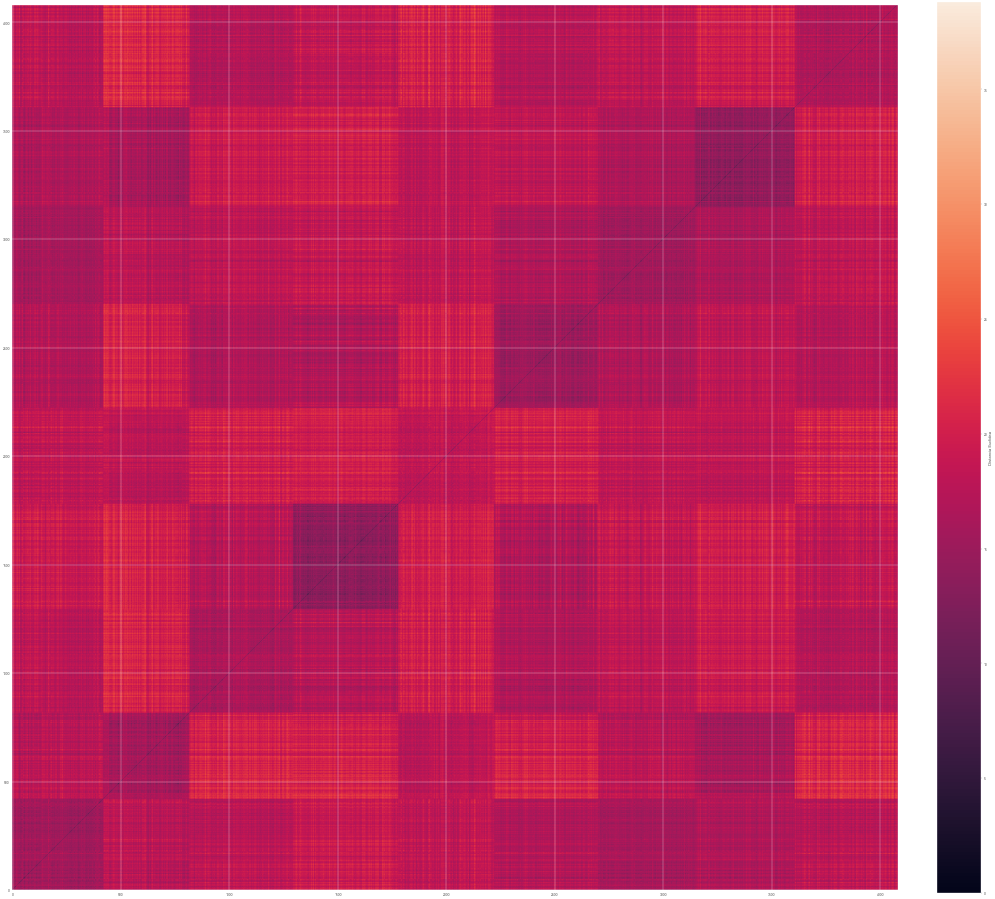

In [11]:
d  = euclidean_distances(df_2, df_2)

plt.figure(figsize=(50,50))
plt.imshow(d,aspect='auto',origin='bottom');
plt.colorbar(label='Distancia Euclidea',fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
#plt.xlabel('Tiempo (segundos)');

## Gráfico dendrograma y Matriz de correlación

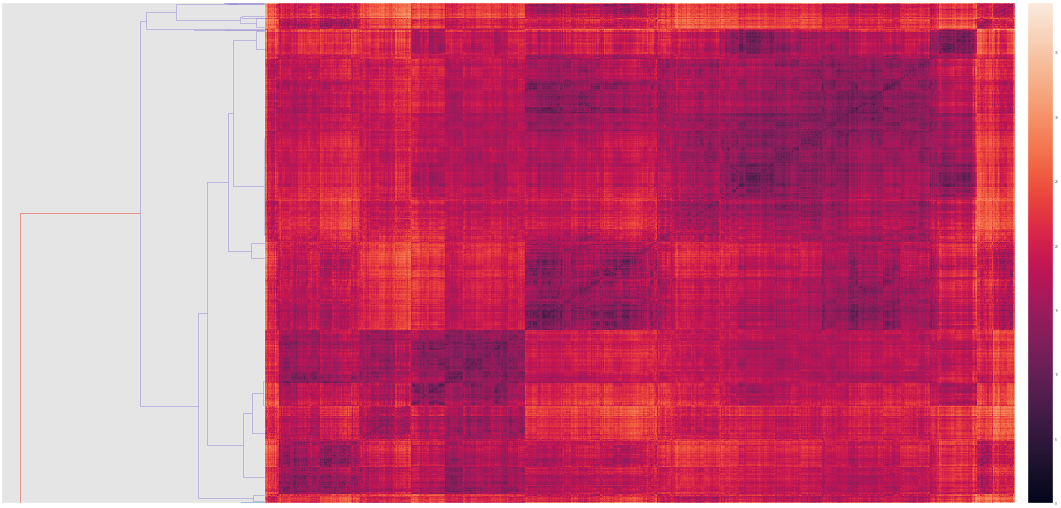

In [12]:
# Abrir figura nueva
fig = pylab.figure()

# Calcular dendrograma y graficar.
axdendro = fig.add_axes([0.09,0.1,0.3,0.8])
Y = linkage(d, method='centroid')
Z = dendrogram(Y, orientation='right')
axdendro.set_xticks([])
axdendro.set_yticks([])
axdendro.invert_xaxis()

# Graficar la matriz de distancias.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']
d = d[index,:]
d = d[:,index]
im = axmatrix.matshow(d, aspect='auto', origin='lower')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Graficar la barra de color
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
pylab.colorbar(im, cax=axcolor)


## Silouhette y SSE

In [13]:
## Silhuette promedio usando sklearn
df=df_2
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df)
silhouette_avg = silhouette_score(df, labels_predicted)
silhouette_avg

0.06817466592332665

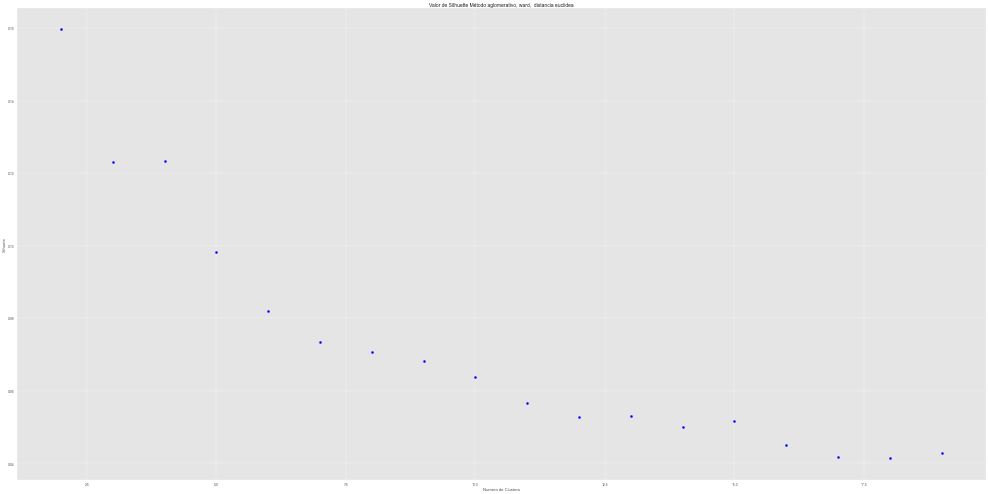

In [14]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, ward,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

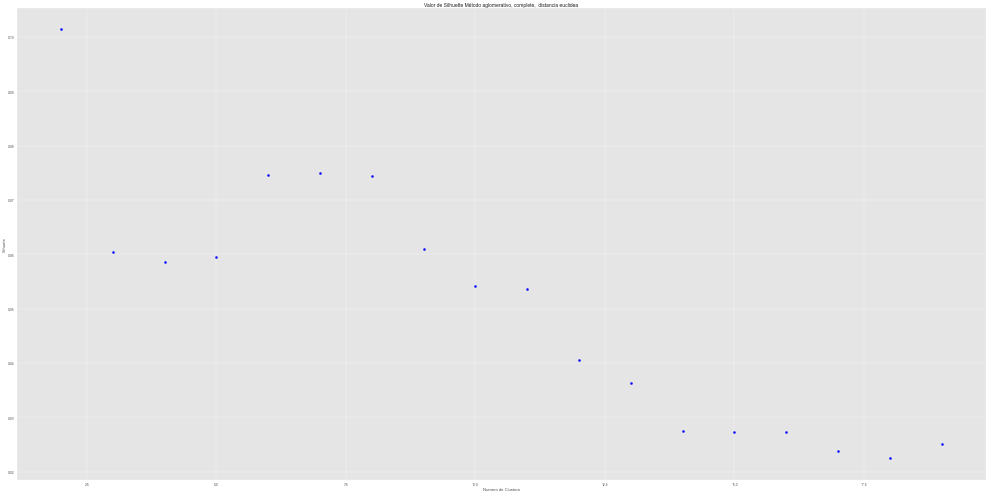

In [15]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, complete,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

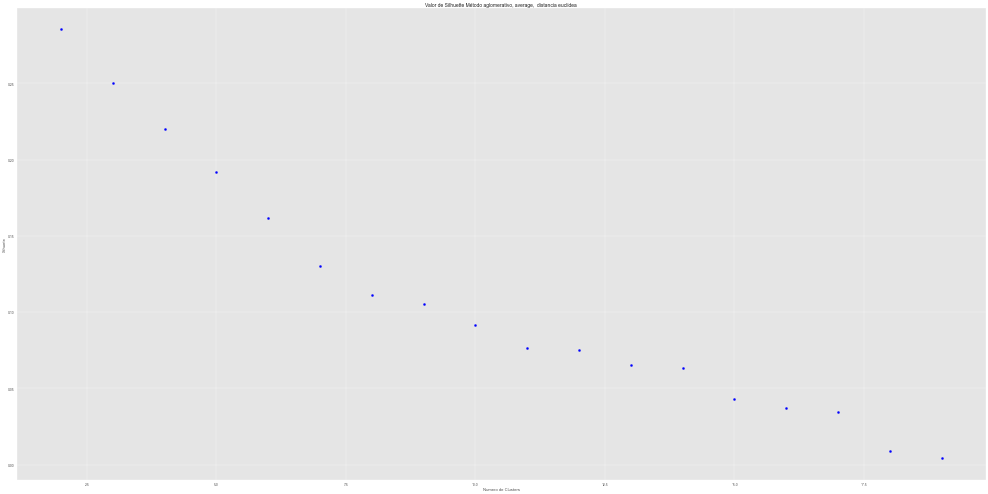

In [16]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, average,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

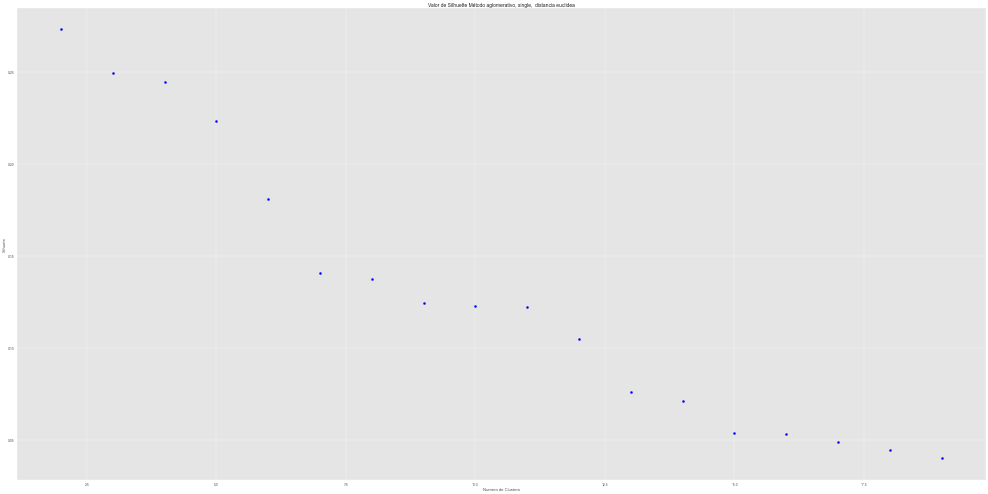

In [17]:
cs=[]
for i in range(2, 20):
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    labels_predicted = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df, labels_predicted)
    cs.append(silhouette_avg)
plt.plot(range(2, 20), cs, 'bo')
plt.title('Valor de Silhuette Método aglomerativo, single,  distancia euclidea')
plt.xlabel('Numero de Clusters')
plt.ylabel('Silhuete')
plt.show()

###  SSE (?) PARA JERARQUICO CREO QUE NO TIENE SENTIDO

## Validación de Clustering Jerarquico (Coeficiente de correlación cofenético)

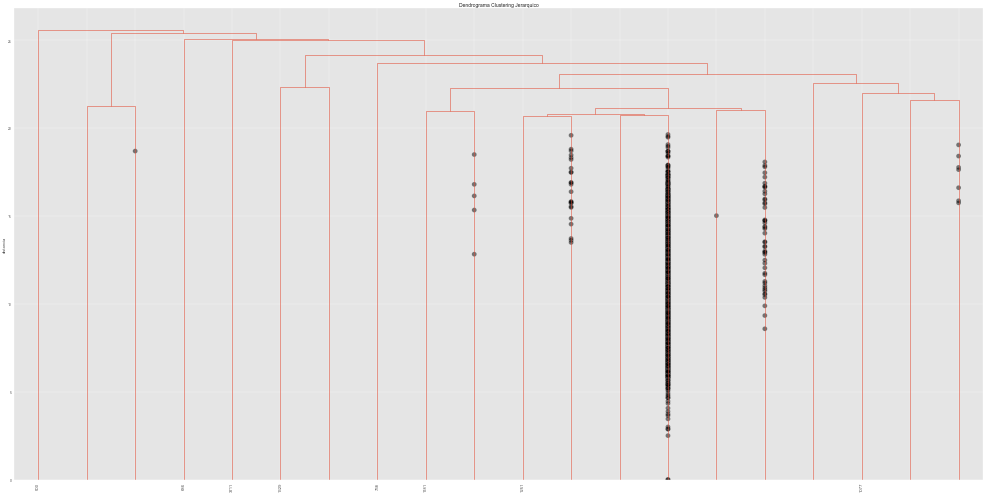

0.6569684773965221

In [18]:
df=df_2
z = linkage(df, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

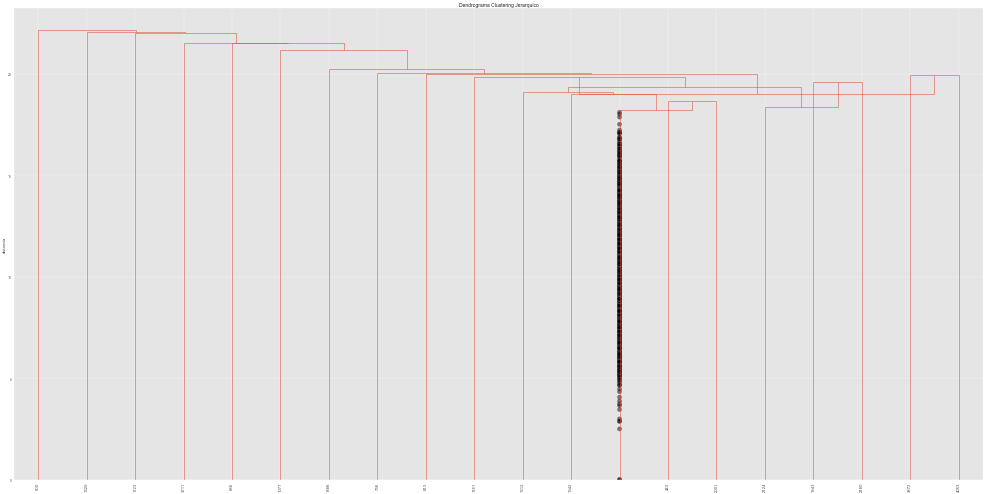

0.5089962793305891

In [19]:
df=df_2
z = linkage(df, method='centroid', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

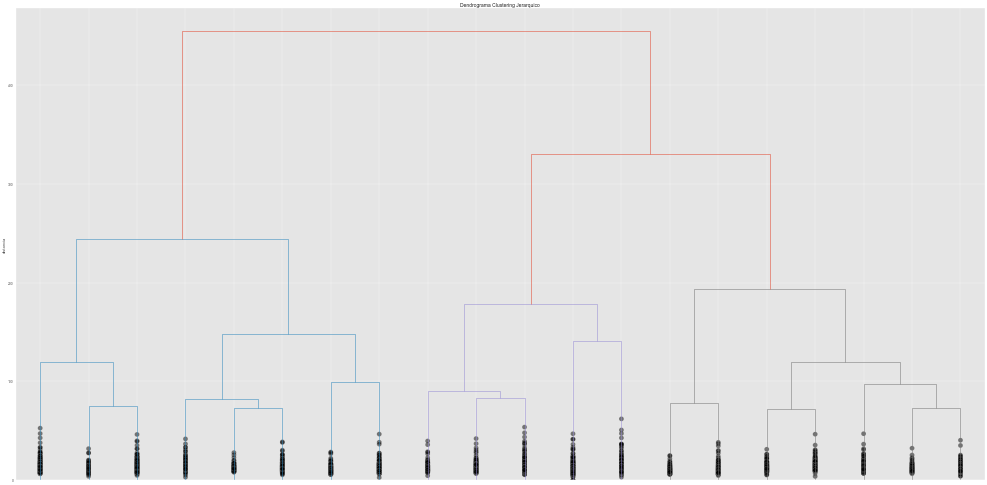

0.5544656943070998

In [20]:
df=df_2
z = linkage(df, method='ward', metric='euclidean')
plt.figure()
dn = dendrogram(
                z,
                show_leaf_counts=False,  # otherwise numbers in brackets are counts
                leaf_rotation=90.,
                leaf_font_size=12.,
                show_contracted=True,  # to get a distribution impression in truncated branches
                p=20 ,
                truncate_mode = 'lastp'
)
plt.title('Dendrograma Clustering Jerarquico')
plt.ylabel('distancia')
plt.show()
c, coph_dists = cophenet(z, pdist(df))
c

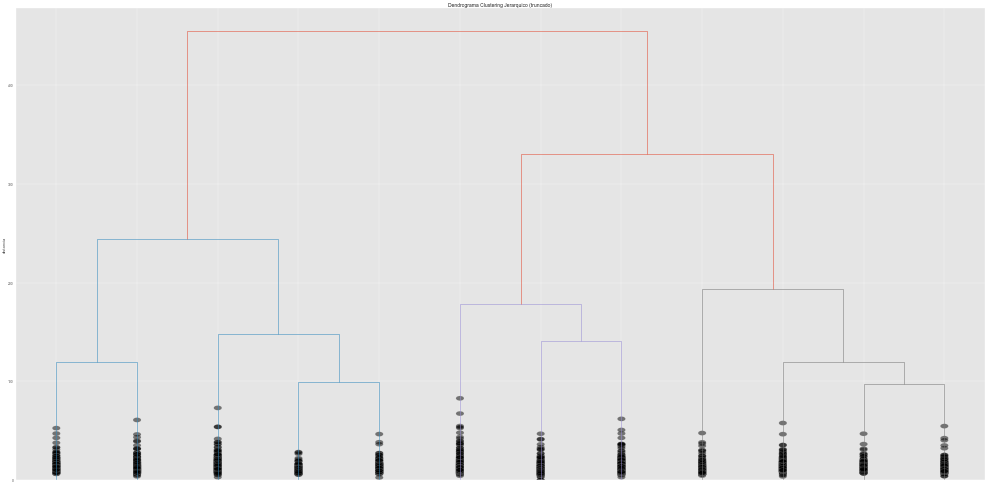

In [21]:
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Dendrograma Clustering Jerarquico (truncado)')
plt.ylabel('distancia')
plt.show()

## b) Agrupamientos similares para distintos conjuntos de datos (validación)

## Matriz de confusion, Índices de Van Dongen y Rand

In [22]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = cluster.fit_predict(df_2)

In [23]:
tmp = pd.DataFrame({'Labels': np.array(genre_real), 'Clusters': labels_predicted})# Create a DataFrame with labels and varieties as columns: df
tmp

,Labels,Clusters
0,jazz,2
1,jazz,2
2,jazz,3
3,jazz,2
4,jazz,2
...,...,...
4077,trance,6
4078,trance,6
4079,trance,0
4080,trance,0


### Matriz de confusión

In [24]:
ct0 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
ct0

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,41,10,63,75,4,85,31,0,133
classical,1,2,71,20,3,121,3,28,147
death-metal,5,148,3,2,325,0,0,0,3
drum-and-bass,222,156,10,6,1,0,82,0,0
jazz,34,7,203,98,1,6,62,3,7
opera,5,0,42,15,0,69,2,301,27
singer-songwriter,66,2,284,55,1,0,34,0,5
ska,335,47,38,8,11,0,38,0,0
trance,186,64,18,13,0,2,191,0,1


## Criterio Van Dongen

### Definición de la función

In [25]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [26]:
print(vanDongen(ct0))

0.5992923485183547


## Indice Rand


In [27]:
# a es el número de pares de objetos que aparecen juntos en un clúster y además pertenecen a la misma clase.
# b es el número de pares de objetos que pertenecen a clases diferentes y además están en clústeres diferentes.
# c es el número de pares de objetos que comparten la clase, pero se ubican en diferentes clústeres.
# d es el número de objetos que pertenecen a clases diferentes, sin embargo se agrupan en el mismo clúster.
# n es el número total de objetos

from sklearn.metrics import adjusted_rand_score

In [28]:
hierarchy_cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
labels_predicted = hierarchy_cluster.fit_predict(df_2)
ari0 = adjusted_rand_score(genre_real, labels_predicted)
ari0

0.26441234209567394

## c) Evaluar si los clusters se condicen con los géneros

### Comparación con matriz de confusión contra géneros

## d) Visualización de los clusters

In [29]:
df_num = df_base.drop('genre',1)
tsne = TSNE(n_components=2, perplexity=20, init='pca')
Xred = tsne.fit_transform(df_num)

In [30]:
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics


def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

def validacion(Z2):
    tmp = pd.DataFrame({'Labels': np.array(genre_real), 'Clusters': Z2})# Create a DataFrame with labels and varieties as columns: df
    ct0 = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Create crosstab: ct
    silhouette = metrics.silhouette_score(df_num, Z2)
    print(f'Silhouette Coefficient: {silhouette:.3f}')
    vandon = vanDongen(ct0)
    print(f'Van Dongen score: {vandon:.3f} (optimo 0.0)')
    ari0 = adjusted_rand_score(genre_real, Z2)
    print(f'Adjusted Rand score: {ari0:.3f} (optimo 1.0)')
    return silhouette,vandon,ari0

Silhouette Coefficient: 0.068
Van Dongen score: 0.599 (optimo 0.0)
Adjusted Rand score: 0.264 (optimo 1.0)


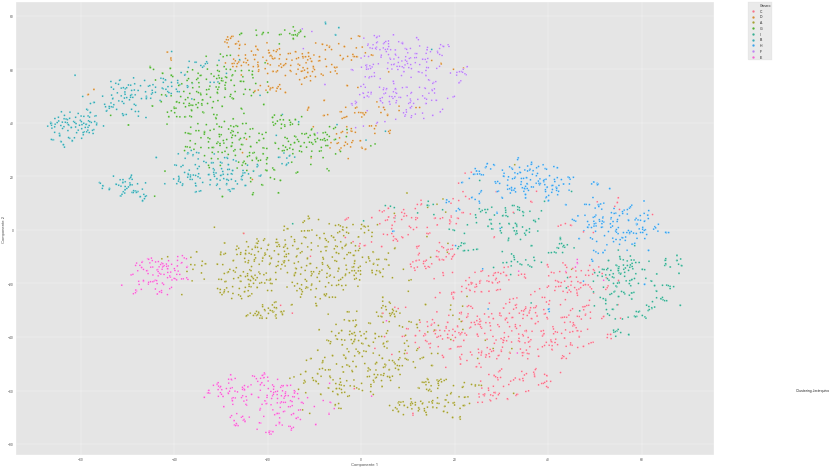

In [33]:
letra = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

Z = labels_predicted
Z2 = [letra[x] for x in Z]

validacion(Z2)

plt.rcParams['figure.figsize'] = [36, 24]

dfff = pd.DataFrame ({"Componente 1":Xred[:,0],"Componente 2":Xred[:,1],"Genero":Z2})
sns.scatterplot(data=dfff, x="Componente 1", y="Componente 2", hue="Genero",alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(100, -60,'Clustering Jerárquico',
     horizontalalignment='right',
     verticalalignment='center')


plt.savefig('tsne_jerarquico.png',dpi=800, bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Conclusiones / Resultados obtenidos